In [47]:
# read intput.txt
lines = []
with open("input1.txt") as f:
    # split text by empty line
    for line in f.read().split("\n\n"):
        lines.append(line.replace("\n", "|").split("|"))

seeds = [int(s) for s in lines[0][0].split(":")[1].strip().split(" ")]


def create_map(lines):
    maps = []
    for entry in lines[1:]:
        key = entry[0].replace(" map:", "")
        values = [v.split(" ") for v in entry[1:]]
        values = [
            {"from": int(v[1]), "to": int(v[0]), "range": int(v[2])} for v in values
        ]
        maps.append({key: values})
    return maps

In [48]:
def map_seed_to_location(maps, seed):
    value = seed
    for m in maps:
        rule_sets = m.values()
        for rules in rule_sets:
            for r in rules:
                if r["from"] <= value <= r["from"] + r["range"]:
                    value = r["to"] + (value - r["from"])
                    break
    return value


def solve_part1(maps, seeds):
    locations = []
    for seed in seeds:
        locations.append(map_seed_to_location(maps, seed))
    print("Part1:", min(locations))


maps = create_map(lines)
solve_part1(maps, seeds)

Part1: 35


######################
intervals


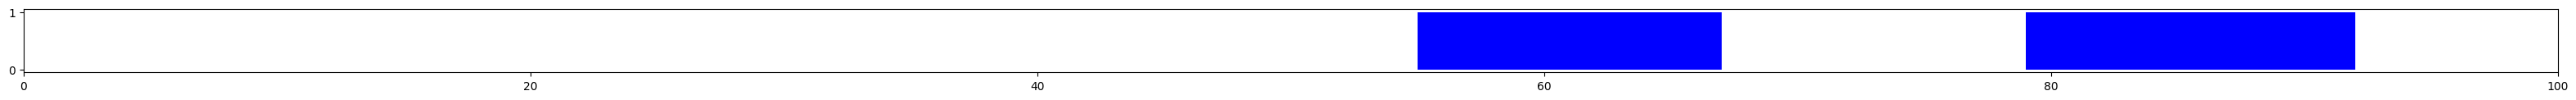

rule_interval {'from': 98, 'to': 50, 'range': 2}


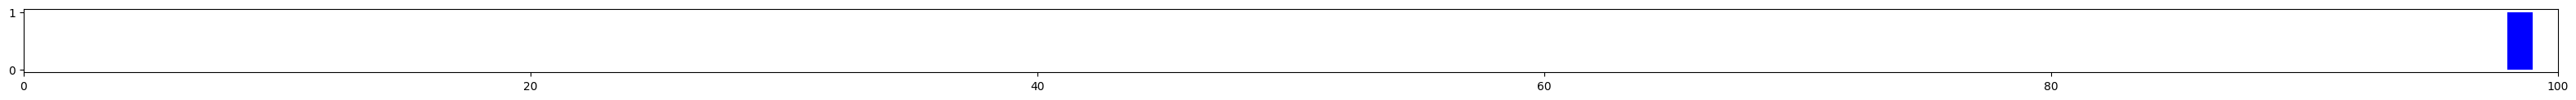

rule_interval {'from': 50, 'to': 52, 'range': 48}


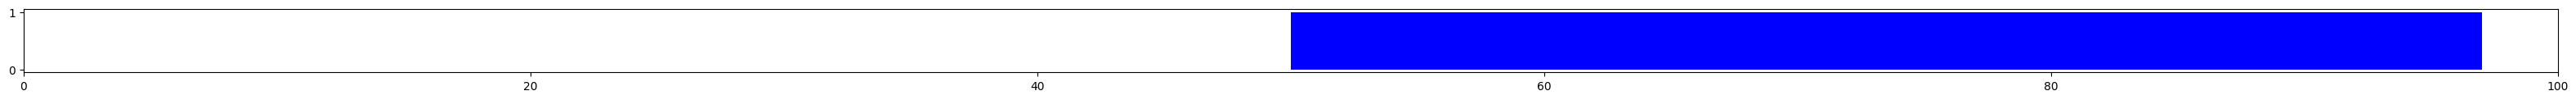

new_intervals


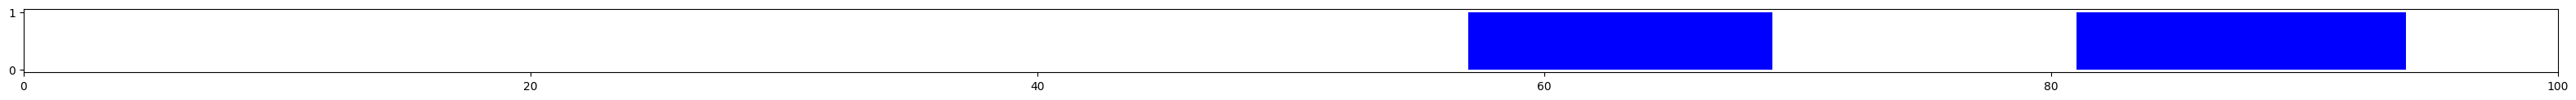

rest_intervals


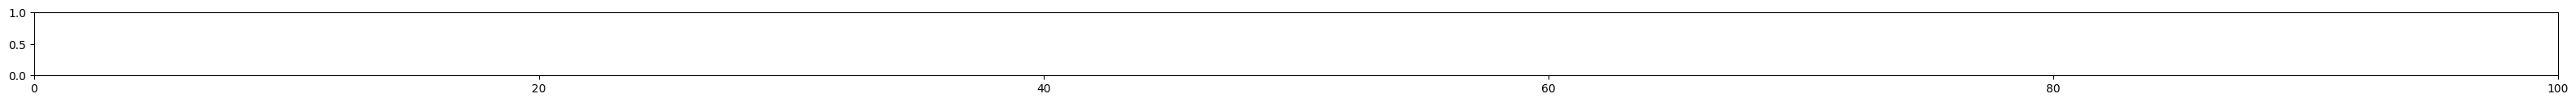

# [57,69] | [81,94]
######################
intervals


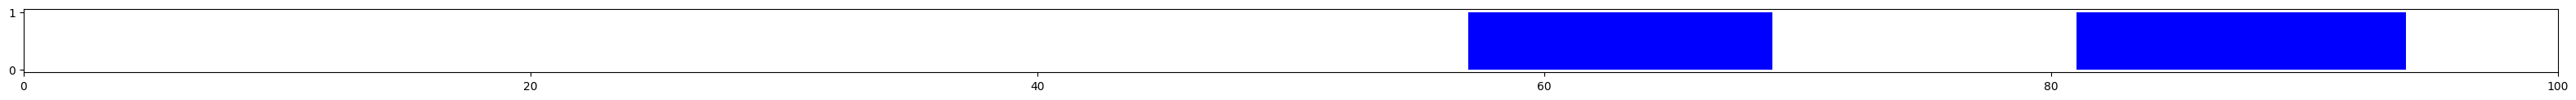

rule_interval {'from': 15, 'to': 0, 'range': 37}


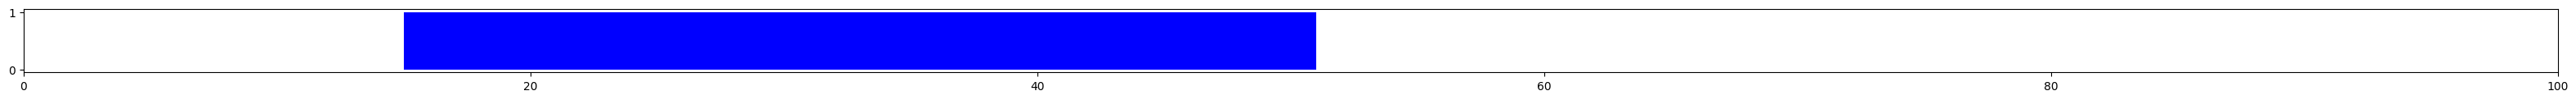

rule_interval {'from': 52, 'to': 37, 'range': 2}


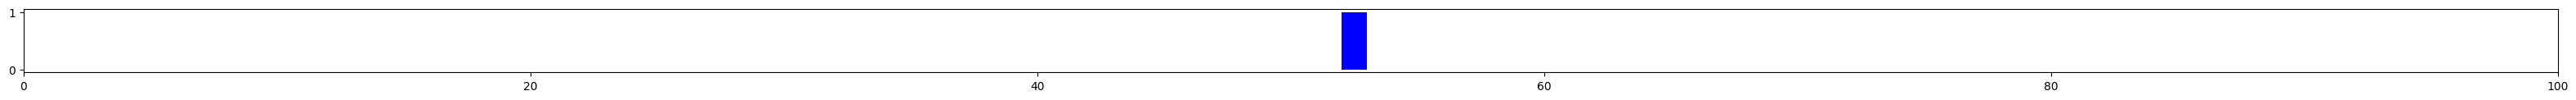

rule_interval {'from': 0, 'to': 39, 'range': 15}


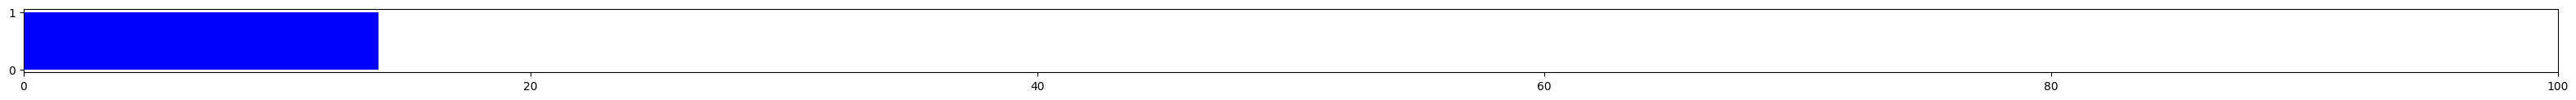

new_intervals


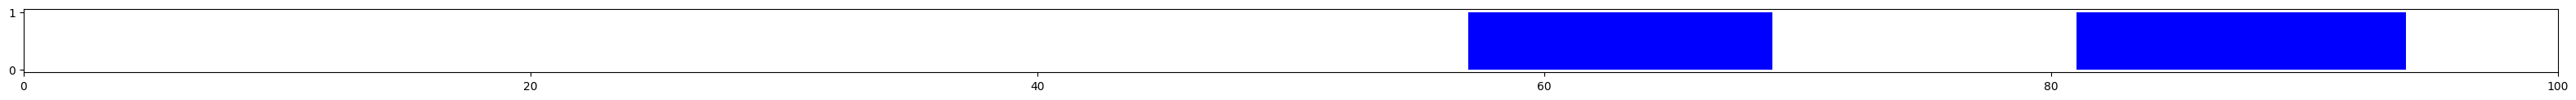

rest_intervals


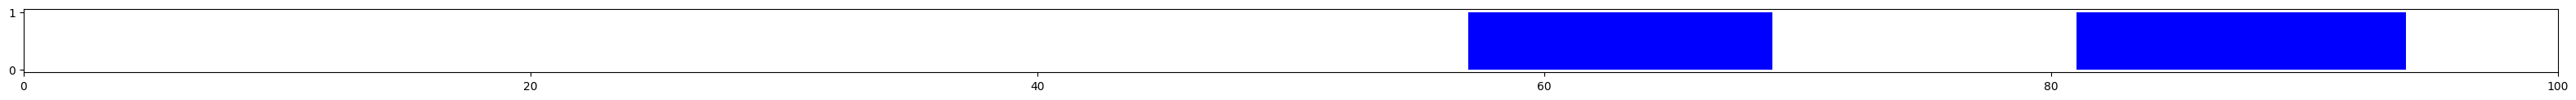

# [57,69] | [81,94]
######################
intervals


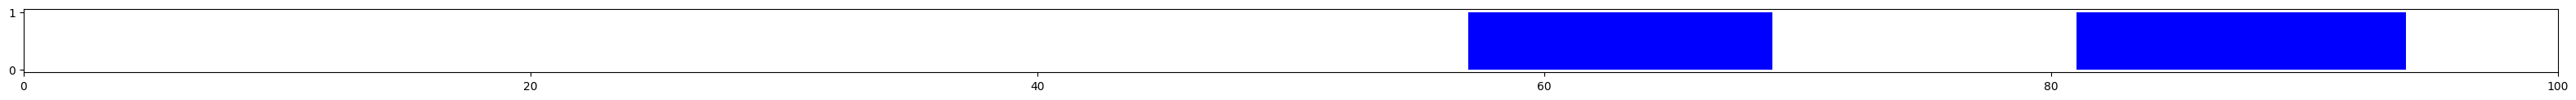

rule_interval {'from': 53, 'to': 49, 'range': 8}


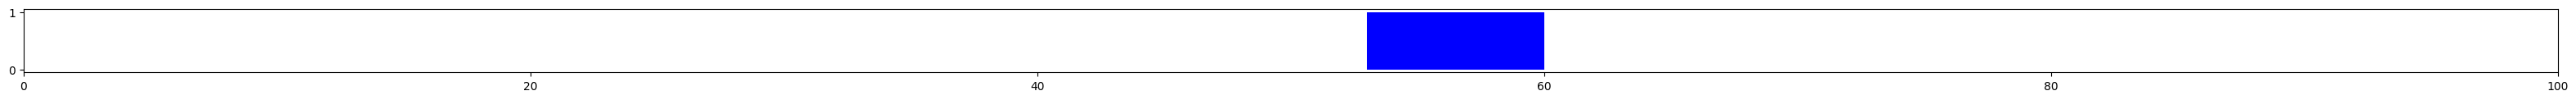

rule_interval {'from': 11, 'to': 0, 'range': 42}


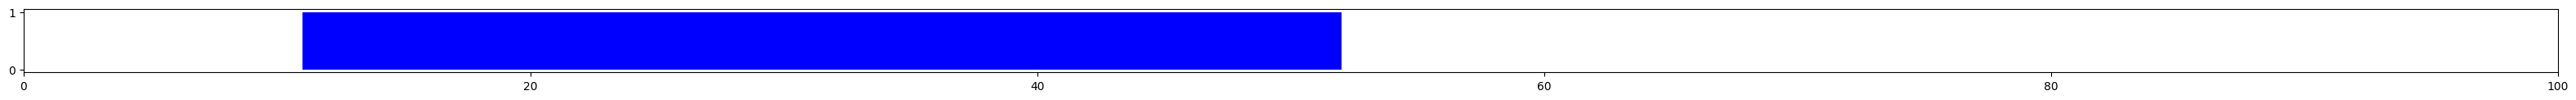

rule_interval {'from': 0, 'to': 42, 'range': 7}


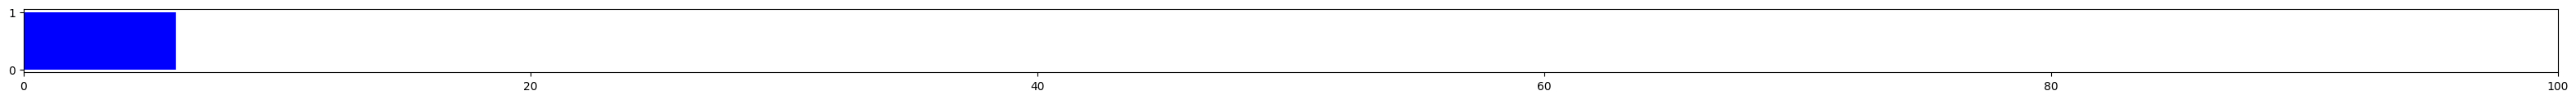

rule_interval {'from': 7, 'to': 57, 'range': 4}


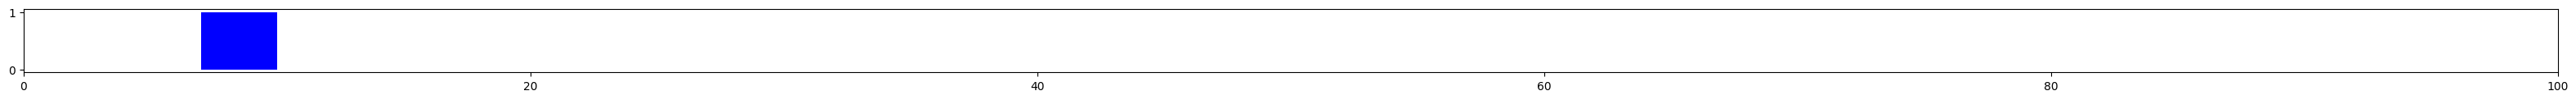

new_intervals


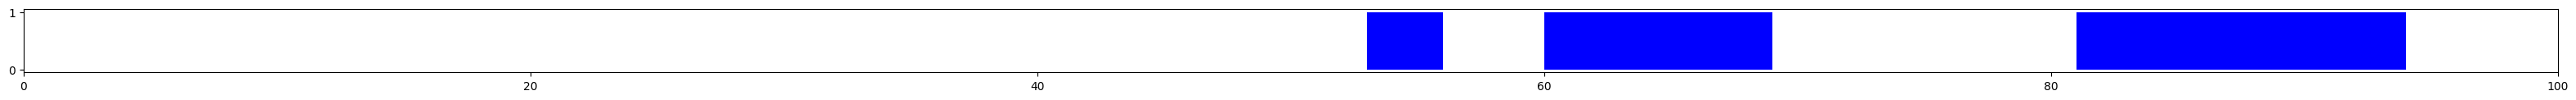

rest_intervals


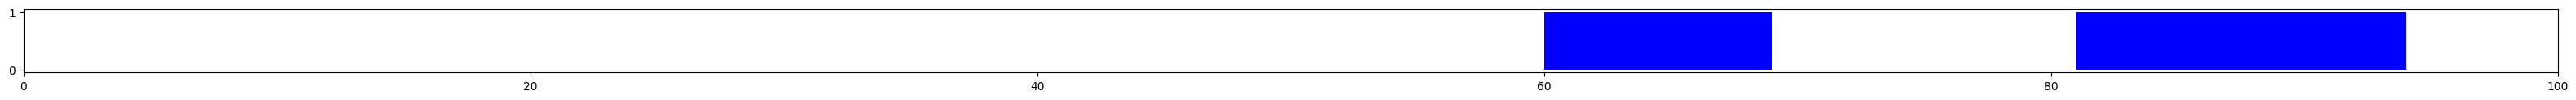

# [53,56] | (60,69] | [81,94]
######################
intervals


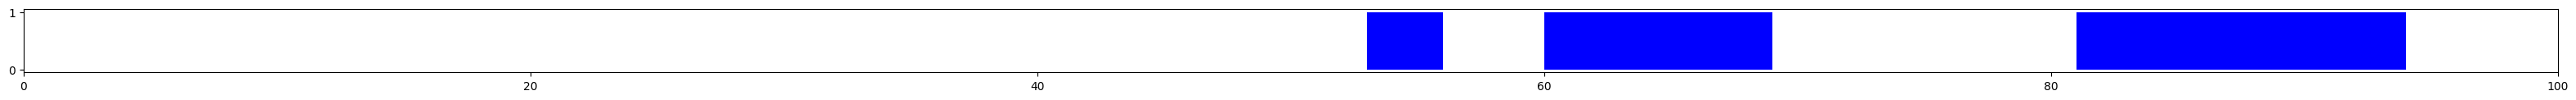

rule_interval {'from': 18, 'to': 88, 'range': 7}


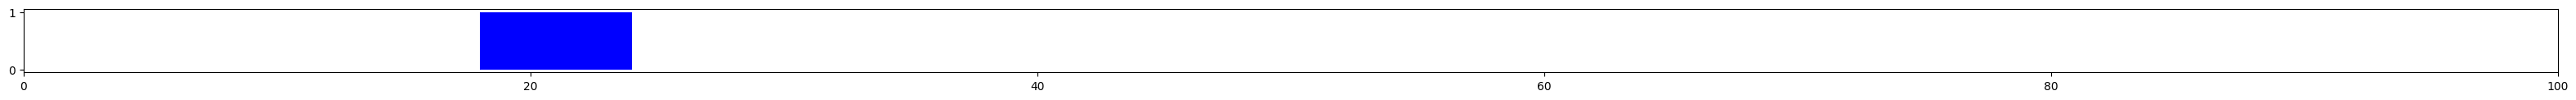

rule_interval {'from': 25, 'to': 18, 'range': 70}


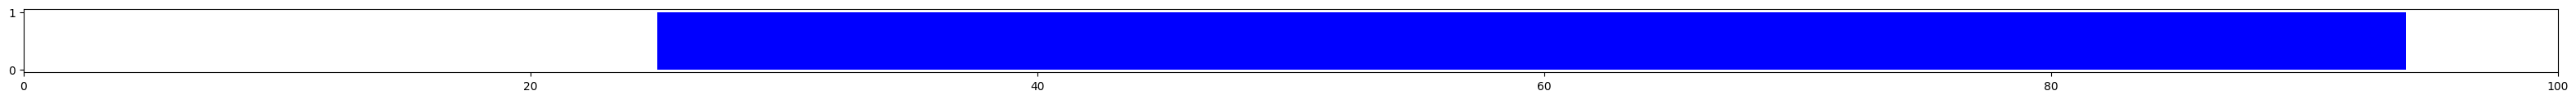

new_intervals


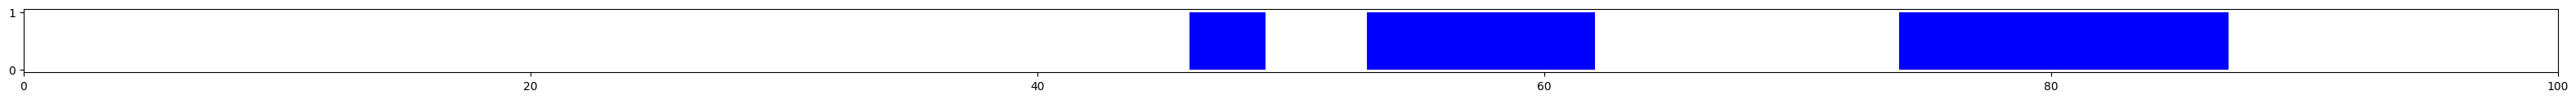

rest_intervals


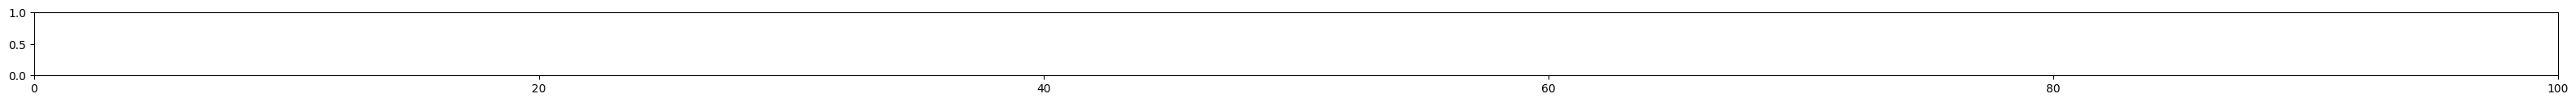

# [46,49] | (53,62] | [74,87]
######################
intervals


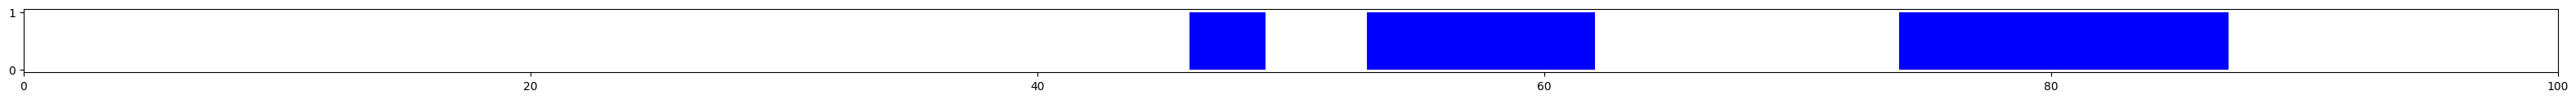

rule_interval {'from': 77, 'to': 45, 'range': 23}


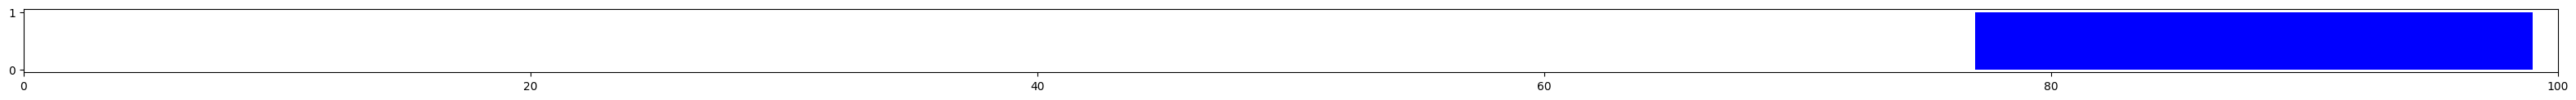

rule_interval {'from': 45, 'to': 81, 'range': 19}


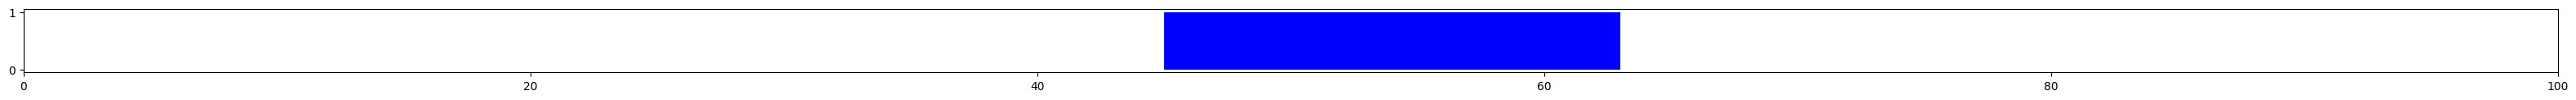

rule_interval {'from': 64, 'to': 68, 'range': 13}


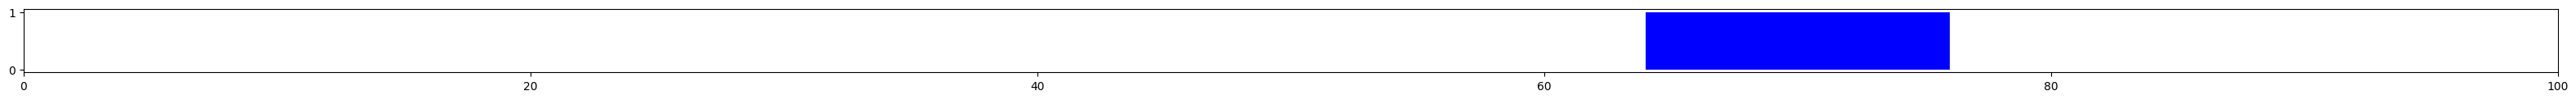

new_intervals


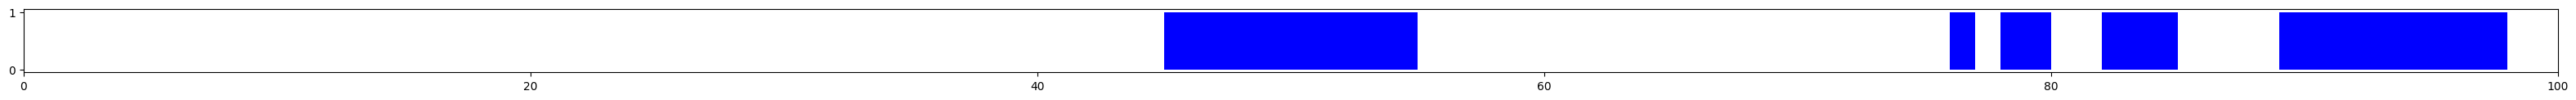

rest_intervals


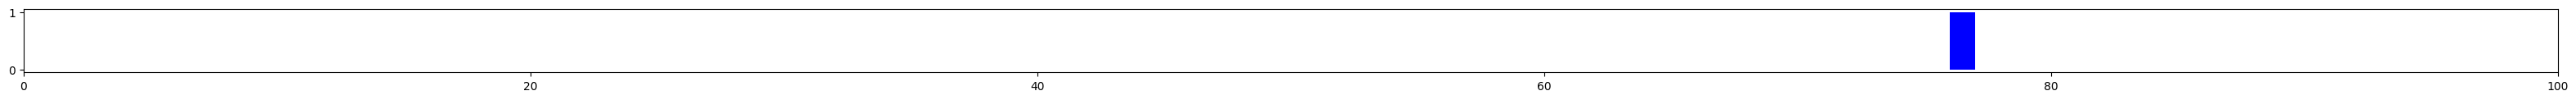

# [45,55] | (76,77) | [78,80] | [82,85] | (89,98]
######################
intervals


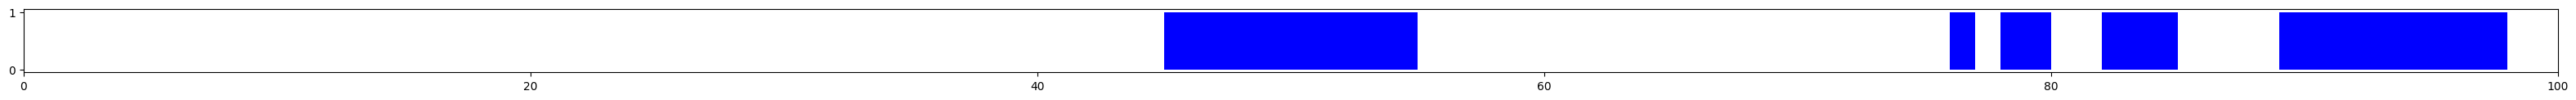

rule_interval {'from': 69, 'to': 0, 'range': 1}


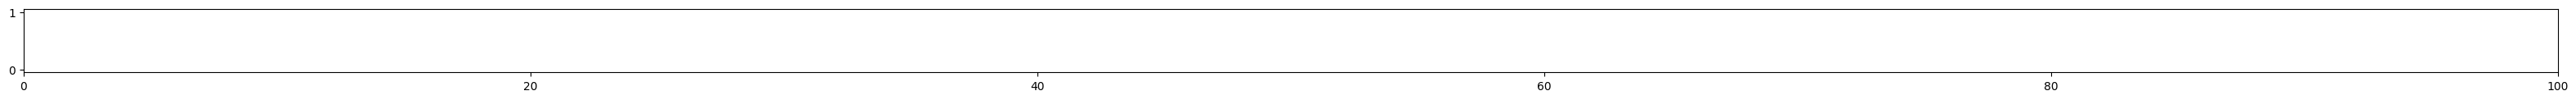

rule_interval {'from': 0, 'to': 1, 'range': 69}


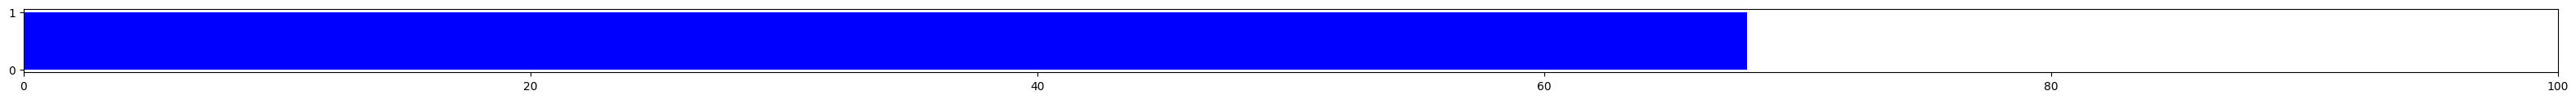

new_intervals


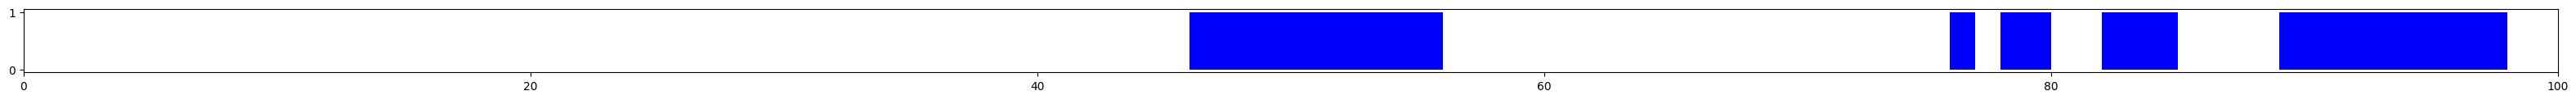

rest_intervals


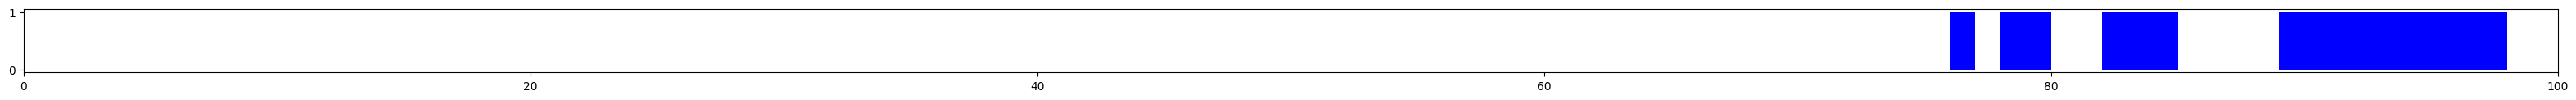

# [46,56] | (76,77) | [78,80] | [82,85] | (89,98]
######################
intervals


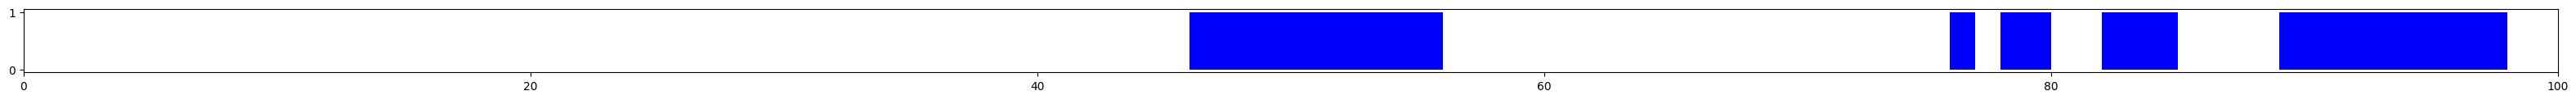

rule_interval {'from': 56, 'to': 60, 'range': 37}


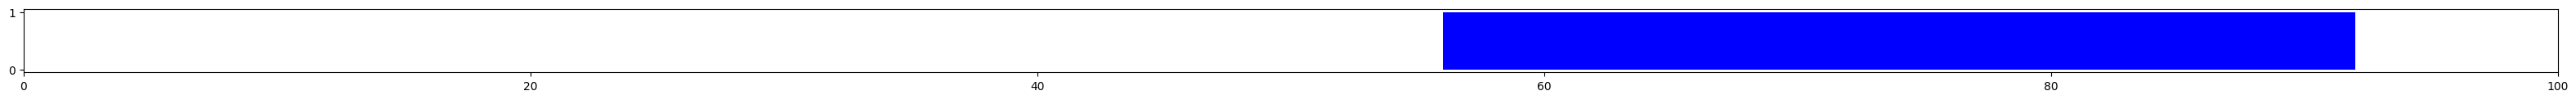

rule_interval {'from': 93, 'to': 56, 'range': 4}


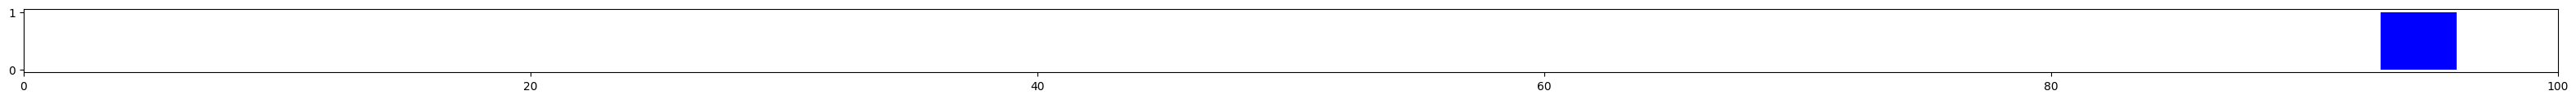

new_intervals


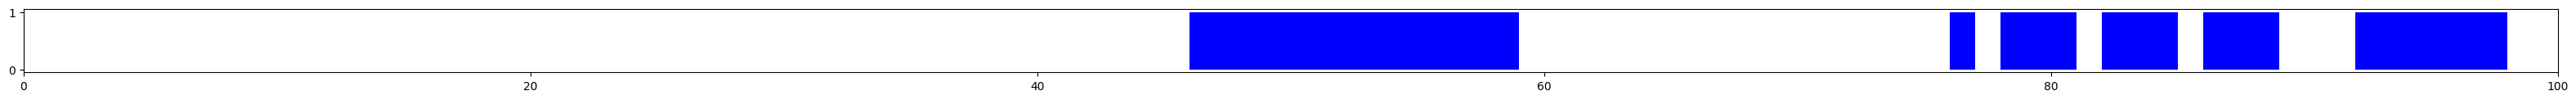

rest_intervals


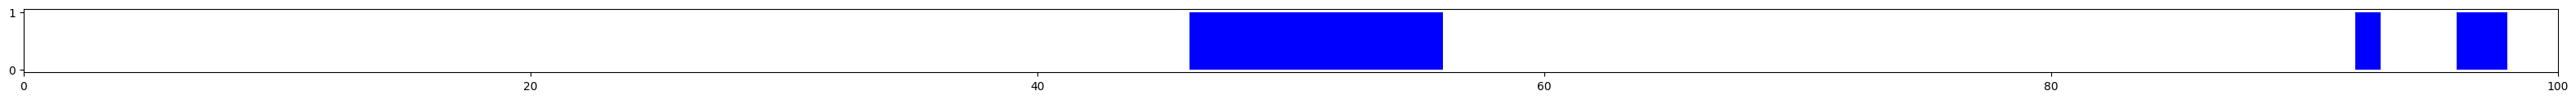

# [46,59] | [60] | (76,77) | [78,81) | [82,85] | [86,89] | (92,93) | (93,98]
part2 [46,59] | [60] | (76,77) | [78,81) | [82,85] | [86,89] | (92,93) | (93,98]
Part2: 46


In [51]:
# groub seeds in tupples of even and odd e.g (1,2),(3,4),(5,6)
import portion as P


def parse_intervals(seeds):
    seed_rages = [
        (seeds[i], seeds[i] + seeds[i + 1] - 1) for i in range(0, len(seeds), 2)
    ]
    intervals = P.empty()
    for sr in seed_rages:
        intervals = intervals | P.closed(sr[0], sr[1])
    return intervals


def apply_rule(interval, r):
    if interval == P.empty():
        return interval, interval
    else:
        rule_interval = P.closed(r["from"], r["from"] + r["range"] - 1)
        shift = r["to"] - r["from"]
        rest = P.empty()
        if interval.overlaps(rule_interval):
            # print("interval")
            # plot_intervals(interval)
            # print("rule_interval")
            # plot_intervals(rule_interval)
            intersection = interval & rule_interval
            rest = interval - intersection
            interval = intersection.apply(
                lambda x: (x.left, x.lower + shift, x.upper + shift, x.right)
            )
            # print("interval_new")
            # plot_intervals(interval)
            # print("rest")
            # plot_intervals(rest)
            # print("##################")
        else:
            return P.empty(), interval  # interval becomes rest
        return interval, rest  # both are of type portion.Interval


# iterate over maps and modify intervals according to rules
def apply_ruleset(intervals, ruleset):
    new_intervals = P.empty()
    rest_intervals = P.empty()
    print("######################")
    print("intervals")
    plot_intervals(intervals)

    for r in ruleset:
        rule_interval = P.closed(r["from"], r["from"] + r["range"] - 1)
        print("rule_interval", r)
        plot_intervals(rule_interval)

    for interval in intervals:
        interval_hit = False
        for r in ruleset:
            new_interval, rest = apply_rule(rest_intervals, r)
            new_intervals = new_intervals | new_interval
            rest_intervals = rest

            if not interval_hit:
                new_interval, rest = apply_rule(interval, r)
                new_intervals = new_intervals | new_interval
                rest_intervals = rest_intervals | rest
                if rest != P.empty():
                    interval_hit = True

        new_intervals = new_intervals | rest_intervals

    print("new_intervals")
    plot_intervals(new_intervals)
    print("rest_intervals")
    plot_intervals(rest_intervals)

    # new_intervals = new_intervals | rest_intervals
    return new_intervals


def solve_part2(seeds):
    intervals = parse_intervals(seeds)
    maps = create_map(lines)

    for m in maps:
        rule_sets = m.values()
        for rules in rule_sets:
            intervals = apply_ruleset(intervals, rules)
            # plot_intervals(intervals)
            print("#", intervals)

    min_interval = min(intervals, key=lambda i: i.lower)
    print("part2", intervals)
    print("Part2:", min_interval.lower)


import matplotlib.pyplot as plt
import numpy as np


def plot_intervals(intervals):
    fig, ax = plt.subplots(figsize=(40, 1))
    for i in intervals:
        ax.broken_barh([(i.lower, i.upper - i.lower)], (0, 1), facecolors="blue")
    ax.set_xlim([0, 100])  # Set x-limits from 0 to 100
    plt.show()


solve_part2(seeds)